In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

0it [00:00, ?it/s]

170500096it [00:02, 65728904.73it/s]                               


Files already downloaded and verified


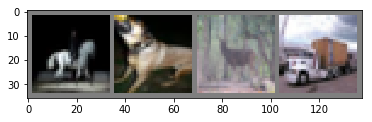

horse   dog  deer truck


In [8]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9 )

In [11]:
for epoch in range(2):
  
  running_loss = 0.0
  
  for i,data in enumerate(trainloader,0):
    # get the inputs; data is a list of [inputs, labels]
    inputs,labels = data
    
    #zero the gradients
    optimizer.zero_grad()
    
    # forward + backward + optimize
    
    outputs = net(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
 

[1,  2000] loss: 2.266
[1,  4000] loss: 1.874
[1,  6000] loss: 1.713
[1,  8000] loss: 1.586
[1, 10000] loss: 1.520
[1, 12000] loss: 1.493
[2,  2000] loss: 1.408
[2,  4000] loss: 1.384
[2,  6000] loss: 1.381
[2,  8000] loss: 1.329
[2, 10000] loss: 1.300
[2, 12000] loss: 1.282
Finished Training


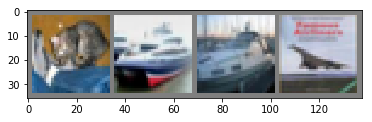

GroundTruth:    cat  ship  ship plane


In [12]:
dataiter = iter(testloader)
imagest, labelst = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(imagest))
print('GroundTruth: ', ' '.join('%5s' % classes[labelst[j]] for j in range(4)))

In [27]:
outputs = net(imagest)
labelst.size()

torch.Size([4])

In [28]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat  ship  ship plane


In [31]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 60 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

In [0]:
with torch.no_grad():
  for data in testloader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs,1)
      c = (predicted == labels).squeeze()
      for i in range(4):
            label = labels[i]
            class_correct[label] = 0
            class_total[label] = 0

In [53]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            print(label, class_correct[label])
            class_total[label] += 1
            
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))     

tensor(3) 1
tensor(8) 1
tensor(8) 2
tensor(0) 1
tensor(6) 1
tensor(6) 2
tensor(1) 0
tensor(6) 3
tensor(3) 2
tensor(1) 1
tensor(0) 2
tensor(9) 1
tensor(5) 0
tensor(7) 1
tensor(9) 2
tensor(8) 2
tensor(5) 1
tensor(7) 1
tensor(8) 3
tensor(6) 4
tensor(7) 2
tensor(0) 2
tensor(4) 0
tensor(9) 3
tensor(5) 1
tensor(2) 1
tensor(4) 0
tensor(0) 2
tensor(9) 4
tensor(6) 5
tensor(6) 6
tensor(5) 1
tensor(4) 0
tensor(5) 2
tensor(9) 5
tensor(2) 2
tensor(4) 1
tensor(1) 2
tensor(9) 6
tensor(5) 3
tensor(4) 1
tensor(6) 7
tensor(5) 4
tensor(6) 8
tensor(0) 3
tensor(9) 7
tensor(3) 3
tensor(9) 7
tensor(7) 2
tensor(6) 9
tensor(9) 7
tensor(8) 4
tensor(0) 3
tensor(3) 4
tensor(8) 5
tensor(8) 6
tensor(7) 2
tensor(7) 2
tensor(4) 1
tensor(6) 9
tensor(7) 3
tensor(3) 5
tensor(6) 10
tensor(3) 5
tensor(6) 11
tensor(2) 3
tensor(1) 3
tensor(2) 4
tensor(3) 6
tensor(7) 3
tensor(2) 4
tensor(6) 11
tensor(8) 7
tensor(8) 8
tensor(0) 3
tensor(2) 5
tensor(9) 7
tensor(3) 7
tensor(3) 8
tensor(8) 9
tensor(8) 9
tensor(1) 3
tensor(1) 4
t

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [14]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [0]:
inputs, labels = data[0].to(device), data[1].to(device)

tensor([0, 2, 2, 2])